<a href="https://colab.research.google.com/github/YoussefAlameldeen/Predicting-Mosfet-Drain-Current/blob/main/Mosfet_Drain_Current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Frameworks And Libraries

In [5]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import gdown
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

#Reading Data

In [6]:
# Download the file from Google Drive using gdown
url = 'https://drive.google.com/u/0/uc?id=1F-MZMnizMAHXHRdPeh2v2Y85f7OkZCWG&export=download'
output = 'transistor_data.csv'  # Output file name
gdown.download(url, output, quiet=False)

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv('transistor_data.csv')

Downloading...
From: https://drive.google.com/u/0/uc?id=1F-MZMnizMAHXHRdPeh2v2Y85f7OkZCWG&export=download
To: /content/transistor_data.csv
100%|██████████| 173M/173M [00:02<00:00, 72.9MB/s]


#Drop The Unwanted Coloums

In [7]:
input_columns = ['vds', 'L(um)', 'W(um)', 'drain_length(um)', 'temperature', 'vgs', 'vsb']
output_column = 'id(uA)'

# Keep only the specified columns
selected_data = data[input_columns + [output_column]]
data = selected_data

# Extracting input and output variables
X = data[input_columns]
y = data[output_column]

#Previewing The Data

In [8]:
data

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,id(uA)
0,-0.45,8.00,0.84,0.3,27.0,0.0,0.0,0.034866
1,-0.40,8.00,0.84,0.3,27.0,0.0,0.0,0.009451
2,-0.35,8.00,0.84,0.3,27.0,0.0,0.0,0.002331
3,-0.30,8.00,0.84,0.3,27.0,0.0,0.0,0.000532
4,-0.25,8.00,0.84,0.3,27.0,0.0,0.0,0.000111
...,...,...,...,...,...,...,...,...
871483,2.30,0.15,7.00,0.3,27.0,1.8,1.5,4289.588350
871484,2.35,0.15,7.00,0.3,27.0,1.8,1.5,4326.932100
871485,2.40,0.15,7.00,0.3,27.0,1.8,1.5,4364.240650
871486,2.45,0.15,7.00,0.3,27.0,1.8,1.5,4401.516730


#EDA

In [9]:
# Display the first few rows of the DataFrame to understand the structure of the data
print(data.head())

# Get an overview of the data types and missing values
print(data.info())

# Summary statistics of numerical columns
print(data.describe())

    vds  L(um)  W(um)  drain_length(um)  temperature  vgs  vsb    id(uA)
0 -0.45    8.0   0.84               0.3         27.0  0.0  0.0  0.034866
1 -0.40    8.0   0.84               0.3         27.0  0.0  0.0  0.009451
2 -0.35    8.0   0.84               0.3         27.0  0.0  0.0  0.002331
3 -0.30    8.0   0.84               0.3         27.0  0.0  0.0  0.000532
4 -0.25    8.0   0.84               0.3         27.0  0.0  0.0  0.000111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871488 entries, 0 to 871487
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   vds               871488 non-null  float64
 1   L(um)             871488 non-null  float64
 2   W(um)             871488 non-null  float64
 3   drain_length(um)  871488 non-null  float64
 4   temperature       871488 non-null  float64
 5   vgs               871488 non-null  float64
 6   vsb               871488 non-null  float64
 7   id(uA)         

#Plotting

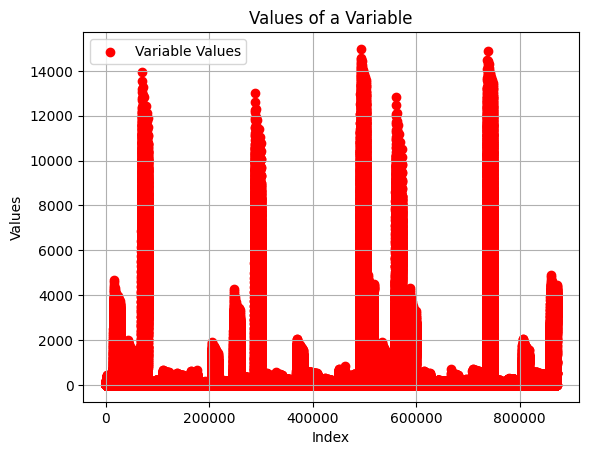

In [10]:
plt.scatter(range(len(y)), y, color='red', label='Variable Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Values of a Variable')
plt.legend()
plt.grid(True)
plt.show()

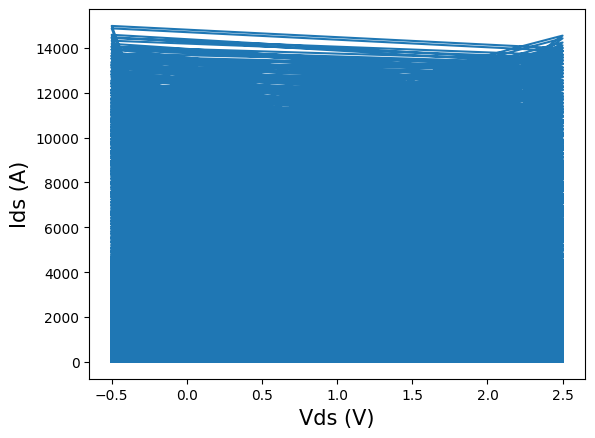

In [11]:
plt.figure(dpi=100)
plt.plot(data['vds'],data['id(uA)'])
plt.xlabel("Vds (V)",fontsize=15)
plt.ylabel("Ids (A)",fontsize=15)
plt.show()

#Spiliting The Data Into Train And Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#1.Random Forest Model

In [13]:
input_columns = ['vds', 'L(um)', 'W(um)', 'drain_length(um)', 'temperature', 'vgs', 'vsb']
output_column = 'id(uA)'

selected_data = data[input_columns + [output_column]]

# Splitting selected_data into X (input features) and y (output)
X = selected_data.drop(columns='id(uA)')  # Selecting all columns except 'id(uA)'
y = selected_data['id(uA)']  # Output is the 'id(uA)' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed

# Fit the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate and print various regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Explained Variance Score: {ev}")


Mean Squared Error (MSE): 79690.00489066969
R-squared (R2): 0.9479702622732641
Mean Absolute Error (MAE): 77.45620011409227
Explained Variance Score: 0.9479704168255652


#2.Implementing Neural Network Model

In [14]:
# Build the Keras model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
43575/43575 [==============================] - 105s 2ms/step - loss: 397137.1562 - mse: 397137.1562 - val_loss: 212894.5000 - val_mse: 212894.5000
Epoch 2/10
43575/43575 [==============================] - 102s 2ms/step - loss: 172911.1406 - mse: 172911.1406 - val_loss: 152729.1875 - val_mse: 152729.1875
Epoch 3/10
43575/43575 [==============================] - 108s 2ms/step - loss: 145703.6719 - mse: 145703.6719 - val_loss: 149970.9688 - val_mse: 149970.9688
Epoch 4/10
43575/43575 [==============================] - 151s 3ms/step - loss: 126784.5781 - mse: 126784.5781 - val_loss: 114402.6172 - val_mse: 114402.6172
Epoch 5/10
43575/43575 [==============================] - 115s 3ms/step - loss: 104787.6641 - mse: 104787.6641 - val_loss: 106274.2344 - val_mse: 106274.2344
Epoch 6/10
43575/43575 [==============================] - 109s 3ms/step - loss: 87128.2422 - mse: 87128.2422 - val_loss: 76887.1953 - val_mse: 76887.1953
Epoch 7/10
43575/43575 [==============================] 

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Mean Squared Error: {test_accuracy}")

5447/5447 [==============================] - 9s 2ms/step - loss: 59903.9414 - mse: 59903.9414
Test Loss: 59903.94140625, Test Mean Squared Error: 59903.94140625


#2.1 Implemnting Neural Network With Cross Validation And k-fold





In [16]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [17]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()

mse_scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build the Keras model with L2 regularization
    model = Sequential()
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)


Test Mean Squared Error: 54854.0078125
Test Mean Squared Error: 52871.89453125
Test Mean Squared Error: 52280.0078125
Test Mean Squared Error: 87550.6171875
Test Mean Squared Error: 66123.140625
Mean of Mean Squared Error across folds: 62735.93359375


#Evaluate the model on the test set


In [18]:
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
mse_scores.append(test_mse)
print(f"Test Mean Squared Error: {test_mse}")

print(f"Mean of Mean Squared Error across folds: {sum(mse_scores) / len(mse_scores)}")


Test Mean Squared Error: 66123.140625
Mean of Mean Squared Error across folds: 63300.468098958336
